In [1]:
%matplotlib widget

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit as fit
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
# import jscatter as js
import sys
import os
from scipy.optimize import curve_fit
# import sys
# sys.path.insert(0, 'functions/')
from functions.fitting_tools import *



# Loading data and variables

In [2]:
path = '../03-source/delta/data_for_maddalena/'
bkg = np.array(np.genfromtxt(path + f'buffer_2_001.chi',skip_header=4,)[:])
qbkg = bkg[bkg[:,1]>0,0]
Ibkg = bkg[bkg[:,1]>0,1]


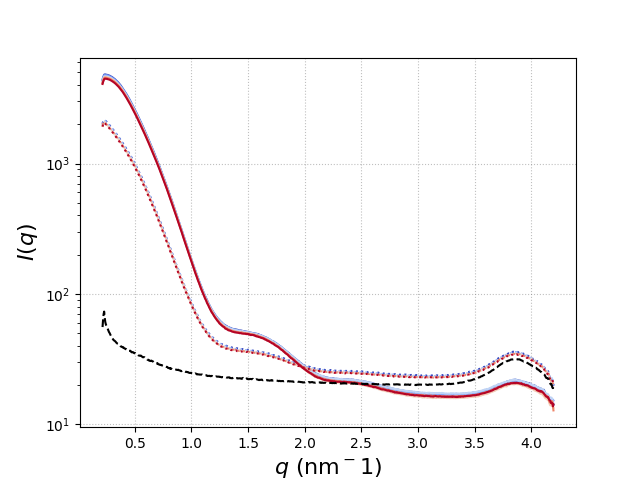

In [3]:
plt.figure()
temperatures=[20,10,-10,-20,-30,-40,]#-50,-60,-70,-80]
temp=abs(np.array(temperatures))
colors=plt.cm.coolwarm(np.linspace(0,1,len(temperatures)))

txt_add=[]
for i,t in enumerate(temperatures):
    if t>=0:
        txt_add+=['']
    else :
        txt_add+=['m']
#Iqs=np.load('./data_for_maddalena/Iq_all.npy')
    data = np.array(np.genfromtxt(path + f'ferr_23mol_gly_t_{txt_add[i]}{temp[i]}_2_001.chi',skip_header=4,)[:])
    qdata = data[data[:,1]>0,0]
    Idata = data[data[:,1]>0,1]
    
    data_dil = np.array(np.genfromtxt(path + f'10mgpml_fer_gly_t_{txt_add[i]}{temp[i]}_2_001.chi',skip_header=4,)[:])
    
    qdat_dil = data_dil[data_dil[:,1]>0,0]
    Idata_dil = data_dil[data_dil[:,1]>0,1]

#data1=(np.genfromtxt('./data_beamtime/ferritin-ff-s13.dat'))
    plt.plot(qdata, Idata, c=colors[i])
    plt.plot(qdat_dil, Idata_dil, c=colors[i], ls=':')

plt.plot(qbkg, Ibkg, label='bkg', c='k', ls='--')

plt.yscale('log')
# plt.legend(title='T (K)', handlelength=1)
plt.ylabel('$I(q)$', fontsize=16)
plt.xlabel(r'$q$ (nm$^-{1}$)', fontsize=16)
plt.grid(ls=":", c='gray', alpha=0.5)



## $I(q)$

In [4]:
# Ibkg[(qdata>b_lim1) & (qdata<b_lim2)]

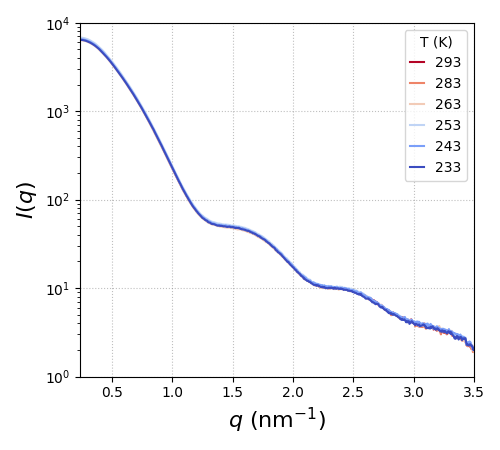

In [5]:
f, ax = plt.subplots(1,1, figsize=(5,4.5), tight_layout=True)

T = [20,10,-10,-20,-30,-40,]#-50,-60,-70,-80]
temp = abs(np.array(temperatures))
colors = plt.cm.coolwarm_r(np.linspace(0,1,len(temperatures)))

txt_add = []

b_lim1, b_lim2 = 3.5, 4.5
for i,t in enumerate(temperatures):
    if t>=0:
        txt_add += ['']
    else :
        txt_add += ['m']

    data = np.array(np.genfromtxt(path + f'ferr_23mol_gly_t_{txt_add[i]}{temp[i]}_2_001.chi',skip_header=4,)[:])
    qdata = data[data[:,1]>0,0]
    Idata = data[data[:,1]>0,1]
    
    data_dil = np.array(np.genfromtxt(path + f'10mgpml_fer_gly_t_{txt_add[i]}{temp[i]}_2_001.chi',skip_header=4,)[:])
    qdat_dil = data_dil[data_dil[:,1]>0,0]
    Idata_dil = data_dil[data_dil[:,1]>0,1]

    ff = 4
    # ax.plot(qdata[ff:], Idata[ff:]/scale - Ibkg[ff:], c=colors[i], label=T[i]+273)
    scale = np.mean(Idata_dil[qdat_dil>b_lim1]) / np.mean(Idata[qdata>b_lim1])
    scale2 = np.mean(Ibkg[(qdata>b_lim1) & (qdata<b_lim2)]) / np.mean(Idata[(qdata>b_lim1) & (qdata<b_lim2)])
    
    # ax.plot(qdata[ff:], Idata[ff:]/np.mean(Idata[qdata>3.5])*np.mean(Idata_dil[qdat_dil>3.5])-Ibkg[ff:], c=colors[i], label=T[i]+273)
    # ax.plot(qdata[ff:], Idata[ff:] * scale, c=colors[i], ls='--', label=T[i]+273)
    # ax.plot(qdata[ff:], Idata[ff:] * scale2, c=colors[i], ls=':', label=T[i]+273)

    ax.plot(qdata[ff:], Idata[ff:] * scale2 - Ibkg[ff:], c=colors[i], label=T[i]+273)

    # ax.plot(qdat_dil, Idata_dil - Ibkg, c=colors[i],ls='dotted',  label=T[i])

# ax.plot(qbkg, Ibkg, label='bkg', c='k', ls='--')
# ax.axvline(x=0.3, ls='--', c='gray')

# # ax.axvline(x=b_lim, ls='--', c='gray')
# ax.axvline(x=b_lim1, ls='--', c='b')
# ax.axvline(x=b_lim2, ls='--', c='b')

ax.legend(title='T (K)', handlelength=1, bbox_to_anchor=[1,1])
ax.set_ylabel('$I(q)$', fontsize=16)
ax.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=16)
ax.set_yscale('log')

ax.set_xlim(qdata[ff],3.5)
ax.set_ylim(1e0,1e4)

ax.grid(ls=":", c='gray', alpha=0.5)

## plot for thesis

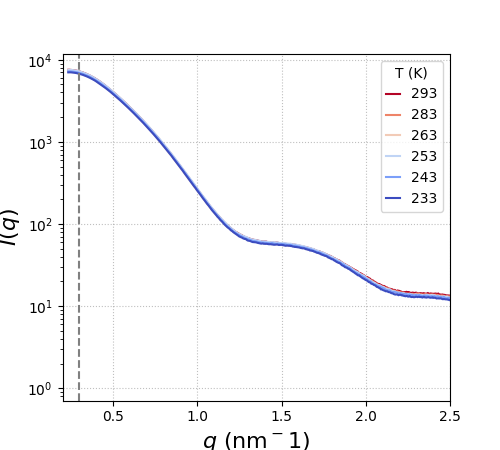

In [6]:
f, ax = plt.subplots(1,1, figsize=(5,4.5))

T = [20,10,-10,-20,-30,-40,]#-50,-60,-70,-80]
temp = abs(np.array(temperatures))
colors = plt.cm.coolwarm_r(np.linspace(0,1,len(temperatures)))

txt_add = []
for i,t in enumerate(temperatures):
    if t>=0:
        txt_add+=['']
    else :
        txt_add+=['m']
    #Iqs=np.load('./data_for_maddalena/Iq_all.npy')
    data = np.array(np.genfromtxt(path + f'ferr_23mol_gly_t_{txt_add[i]}{temp[i]}_2_001.chi',skip_header=4,)[:])
    qdata = data[data[:,1]>0,0]
    Idata = data[data[:,1]>0,1]
    
    data_dil = np.array(np.genfromtxt(path + f'10mgpml_fer_gly_t_{txt_add[i]}{temp[i]}_2_001.chi',skip_header=4,)[:])
    
    qdat_dil = data_dil[data_dil[:,1]>0,0]
    Idata_dil = data_dil[data_dil[:,1]>0,1]

    #data1=(np.genfromtxt('./data_beamtime/ferritin-ff-s13.dat'))
    ff = 4
    ax.plot(qdata[ff:], Idata[ff:]/np.mean(Idata[qdata>3.5])*np.mean(Idata_dil[qdat_dil>3.5])-Ibkg[ff:], c=colors[i], label=T[i]+273)
    # ax.plot(qdat_dil, Idata_dil-Ibkg, c=colors[i],ls='dotted',  label=T[i])

ax.axvline(x=0.3, ls='--', c='gray')

ax.legend(title='T (K)', handlelength=1)
ax.set_ylabel('$I(q)$', fontsize=16)
ax.set_xlabel(r'$q$ (nm$^-{1}$)', fontsize=16)
ax.set_yscale('log')
ax.set_xlim(0.2,2.5)
# ax.set_ylim(1e2,1e4)
ax.grid(ls=":", c='gray', alpha=0.5)


In [7]:
import matplotlib as mpl
from matplotlib import pyplot as plt

In [8]:
def F_sphere(q, R): 
    """Formfactor of a sphere of radius R.    
    Args:
        q (np.ndarray): momentum transfer.
        R (float): radius of particles.
    Returns:
        np.ndarray: the formfactor for each q.
    """
    
    f = 3 * (np.sin(q*R) - q*R*np.cos(q*R)) / ((q*R)**3)  
    return f

NameError: name 'a1' is not defined

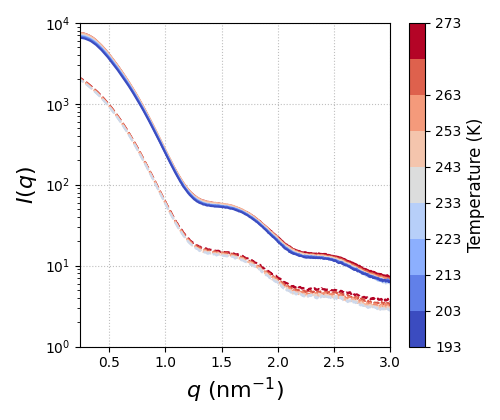

In [9]:
f, ax = plt.subplots(1,1, figsize=(5,4.2), tight_layout=True)

T = [20,10,-10,-20,-30,-40,-50,-60,-70,-80]
temp = abs(np.array(T))
temp2 = np.array(T)
colors = plt.cm.coolwarm_r(np.linspace(0,1,len(temp)))

txt_add = []
for i,t in enumerate(temp):
    if temp2[i]>=0:
        txt_add+=['']
    else :
        txt_add+=['m']

#Iqs=np.load('./data_for_maddalena/Iq_all.npy')
    data = np.array(np.genfromtxt(path + f'ferr_23mol_gly_t_{txt_add[i]}{temp[i]}_2_001.chi',skip_header=4,)[:])
    qdata = data[data[:,1]>0,0]
    Idata = data[data[:,1]>0,1]
    
    if temp2[i] >= -40:
        data_dil = np.array(np.genfromtxt(path + f'10mgpml_fer_gly_t_{txt_add[i]}{temp[i]}_2_001.chi',skip_header=4,)[:])
    else:
        data_dil = np.array(np.genfromtxt(path + f'10mgpml_fer_gly_t_m40_2_001.chi',skip_header=4,)[:])

    # data_dil = np.array(np.genfromtxt(f'./data_for_maddalena/10mgpml_fer_gly_t_{txt_add[i]}{temp[i]}_2_001.chi',skip_header=4,)[:])
    
# diluted data
    qdat_dil = data_dil[data_dil[:,1]>0,0]
    Idata_dil = data_dil[data_dil[:,1]>0,1]

#data1=(np.genfromtxt('./data_beamtime/ferritin-ff-s13.dat'))
    ff = 4
    b_lim1 = 3.4
    c1 = 1
    c2 = 1
    y_ferr =  Idata[ff:] / np.mean(Idata[qdata>b_lim1]) * np.mean(Idata_dil[qdat_dil>b_lim1]) - Ibkg[ff:]
    ax.plot(qdata[ff:], y_ferr / c1, c=colors[i], label=f"{temp2[i]+273}, {temp2[i]}")
    if temp2[i] >= -40:
        ax.plot(qdat_dil, (Idata_dil-Ibkg) / c2, c=colors[i],ls='--')#, label=temp2[i]+273)

    # Soq.append(Sq/np.mean(Sq[(qdata>.8)&(qdata<1.2)]))
    # T_soq.append(temp[i]+273)
R = 4#e-9
ax.plot(qdata[ff:], F_sphere(qdata[ff:], R), ls=':', c='k', label='spherrical ff')
# ax.axvline(x=0.3, ls='--', c='gray')


# -- inset
    
# a1 = ax.inset_axes([.5, .55, .45, .43])
# for i,t in enumerate(T_soq):
#     a1.plot(q_soq[i], Soq[i], c=colors[i])


# -- settings
# ax.legend(title='T (K)', handlelength=1, ncol=2)
ax.set_ylabel('$I(q)$', fontsize=16)
ax.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=16)
ax.set_yscale('log')
ax.set_xlim(qdata[ff],3)
# ax.set_ylim(5e3,8e3)
ax.set_ylim(1,1e4)
ax.grid(ls=":", c='gray', alpha=0.5)

# Create a ScalarMappable and add colorbar with discrete segments
# Use the temperature array as boundaries for discrete segments
temp_kelvin = temp2 + 273
bounds = np.arange(np.min(temp_kelvin), np.max(temp_kelvin), 10)
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=plt.cm.coolwarm.N)
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
sm.set_array([])

# Add the colorbar with discrete segments
cbar = f.colorbar(sm, ax=ax, orientation='vertical', ticks=temp_kelvin, boundaries=bounds)
cbar.set_label('Temperature (K)', fontsize=12)
cbar.ax.minorticks_off()

# Label each tick with the temperature
cbar.ax.set_yticklabels([f'{temp}' for temp in bounds[::-1]])
# cbar.ax.set_yticklabels([f'{temp}' if i % 2 == 0 else '' for i, temp in enumerate(T)])

# -- inset
a1.grid(ls=":", c='gray', alpha=0.5)
# a1.legend(title='T (K)', handlelength=1)
a1.set_ylabel('$S(q)$', fontsize=11)
a1.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=11)
# ax.set_yscale('log')
# a1.set_xlim(0.2, 1.5)
# a1.set_ylim(0.5,1.25)
a1.set_xlim(0.2, .6)
a1.set_ylim(0.7,1.)


$I(q) = c \Delta\rho^2 P(q) S(q)$

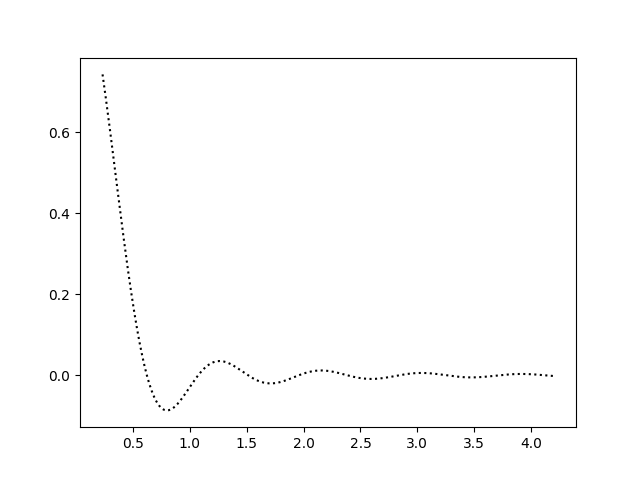

In [ ]:
plt.figure()
R = 7.2#e-9
plt.plot(qdata[ff:], F_sphere(qdata[ff:], R), ls=':', c='k', label='spherrical ff')


## $S(q)$

In [ ]:
!ls data_for_maddalena/*.chi

ls: cannot access data_for_maddalena/*.chi: No such file or directory


(0.7, 1.0)

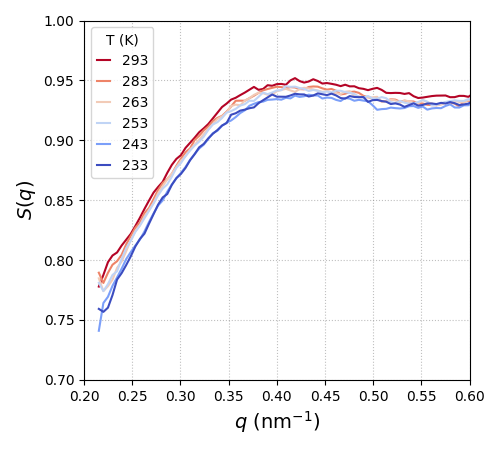

In [ ]:
f, ax = plt.subplots(1,1, figsize=(5,4.5), tight_layout=True)
T = [20,10,-10,-20,-30,-40]#,-50,-60,-70,-80]
# temp = abs(np.array(T))
temp = np.array(T)
colors = plt.cm.coolwarm_r(np.linspace(0,1,len(temp)))
txt_add = []
Soq = []
q_soq = []
T_soq = []

for i,t in enumerate(temp):
    if t >= 0:
        txt_add += ['']
    else:
        txt_add += ['m']

    #Iqs=np.load('./data_for_maddalena/Iq_all.npy')
    data = np.array(np.genfromtxt(path + f'ferr_23mol_gly_t_{txt_add[i]}{abs(temp[i])}_2_001.chi',skip_header=4,)[:])
    qdata = data[data[:,1]>0,0]
    Idata = data[data[:,1]>0,1]
    
    if t >= -40:
        data_dil = np.array(np.genfromtxt(path + f'10mgpml_fer_gly_t_{txt_add[i]}{abs(temp[i])}_2_001.chi',skip_header=4,)[:])
    else:
        data_dil = np.array(np.genfromtxt(path + f'10mgpml_fer_gly_t_m40_2_001.chi',skip_header=4,)[:])
    
    # y_ferr =  Idata[ff:] / np.mean(Idata[qdata>b_lim1]) * np.mean(Idata_dil[qdat_dil>b_lim1]) - Ibkg[ff:]
    # ax.plot(qdata[ff:], y_ferr / c1, c=colors[i], label=f"{temp2[i]+273}, {temp2[i]}")

    qdat_dil = data_dil[data_dil[:,1]>0,0]
    Idata_dil = data_dil[data_dil[:,1]>0,1]
    pq = (Idata_dil/np.mean(Idata_dil[qdat_dil>3.5]) - Ibkg/np.mean(Ibkg[qbkg>3.5]))
    Sq = (Idata/np.mean(Idata[qdata>3.5]) - Ibkg/np.mean(Ibkg[qbkg>3.5]*.93)) / pq
    #data1=(np.genfromtxt('./data_beamtime/ferritin-ff-s13.dat'))
    ax.plot(qdata, Sq/np.mean(Sq[(qdata>.8)&(qdata<1.2)]), color=colors[i], label=temp[i]+273)
    
    Soq.append(Sq/np.mean(Sq[(qdata>.8)&(qdata<1.2)]))
    T_soq.append(temp[i]+273)
    q_soq.append(qdata)

# -- settings
ax.grid(ls=":", c='gray', alpha=0.5)
ax.legend(title='T (K)', handlelength=1)
ax.set_ylabel('$S(q)$', fontsize=14)
ax.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=14)
# ax.set_yscale('log')
ax.set_xlim(0.2, 1.5)
ax.set_ylim(0.5,1.25)

ax.set_xlim(0.2, .6)
ax.set_ylim(0.7,1.)
# plt.savefig("soq.png", dpi=300)



# figure for paper

6 -50 223
7 -60 213
8 -70 203
9 -80 193
0 0.41885996
1 0.43779147
2 0.42832571
3 0.40939417
4 0.43305859
5 0.44252434
6 0.456723
7 0.41412705
8 0.456723
9 0.44252434


(0.75, 1.1)

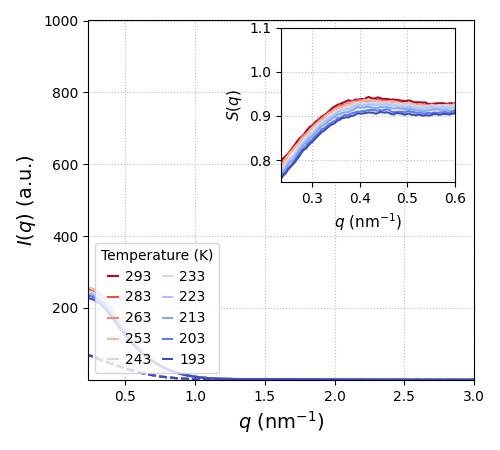

In [28]:
f, ax = plt.subplots(1, 1, figsize=(5, 4.5), tight_layout=True)

# Define temperature and settings
# T = [20, 10, -10, -20, -30, -40]  # Temperatures in Celsius
T = [20, 10, -10, -20, -30, -40, -50, -60, -70, -80]
temp = np.array(T)
colors = plt.cm.coolwarm_r(np.linspace(0, 1, len(temp)))

# Initialize storage for S(q) and q
Soq, Soq2, q_soq, T_soq = [], [], [], []
Iq, q , T_Iq = [], [], []
Iq_dil, q_dil  = [], []

# parameters for normlization and bkg subtraction
ff = 4
b_lim1 = 3.4


# Loop over temperatures
for i, t in enumerate(temp):
    # Prefix for file naming
    txt_add = '' if t >= 0 else 'm'

    # Load data
    data = np.genfromtxt(path + f'ferr_23mol_gly_t_{txt_add}{abs(t)}_2_001.chi', skip_header=4)
    qdata = data[data[:, 1] > 0, 0]
    Idata = data[data[:, 1] > 0, 1]

    # Load diluted data
    if t >= -40:
        data_dil = np.genfromtxt(path + f'10mgpml_fer_gly_t_{txt_add}{abs(t)}_2_001.chi', skip_header=4)
    else:
        print(i, t, t+273)
        data_dil = np.genfromtxt(path + f'10mgpml_fer_gly_t_m40_2_001.chi', skip_header=4)

    qdat_dil = data_dil[data_dil[:, 1] > 0, 0]
    Idata_dil = data_dil[data_dil[:, 1] > 0, 1]

    # Plot I(q)
    y_ferr =  Idata / np.mean(Idata[qdata>b_lim1]) * np.mean(Idata_dil[qdat_dil>b_lim1]) - Ibkg
    # Iq.append(y_ferr[ff:])
    q.append(qdata[ff:])
    T_Iq.append(t + 273)
    # ax.plot(qdata[ff:], y_ferr[ff:] , c=colors[i], label=f"{temp[i]+273}") 

    # Plot dil I(q)
    if t >= -40:
        # Iq_dil.append(Idata_dil-Ibkg)
        q_dil.append(qdat_dil)
        y = (Idata_dil-Ibkg)
        # ax.plot(qdat_dil, y , c=colors[i], ls='--')

    
    # Calculate structure factor S(q)
    Iq_dil.append(Idata_dil / np.mean(Idata_dil[qdat_dil > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1]))
    Iq.append( Idata / np.mean(Idata[qdata > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1]))

    pq = Idata_dil / np.mean(Idata_dil[qdat_dil > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1])
    Sq = ( Idata / np.mean(Idata[qdata > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1]) ) / pq
   
    
    ax.plot(qdata[:], Idata / np.mean(Idata[qdata > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1]) , c=colors[i], label=f"{temp[i]+273}") 
    ax.plot(qdat_dil, pq , c=colors[i], ls='--') 

    # Normalize and plot
    normalized_Sq = Sq / np.mean(Sq[(qdata > 0.8) & (qdata < 1.2)])
    # ax.plot(qdata, normalized_Sq, color=colors[i], label=f"{temp[i] + 273} K")

    # Store data for inset
    Soq.append(normalized_Sq)
    T_soq.append(temp[i] + 273)
    q_soq.append(qdata)

# -- inset Soq
a1 = ax.inset_axes([.5, .55, .45, .43])
for i,t in enumerate(T_soq[:]):
    # Sq = Iq[i] / np.average(Iq_dil, axis=0)
    # a1.plot(q_soq[i], Sq, c=colors[i])

    a1.plot(q_soq[i][ff:], Soq[i][ff:], c=colors[i])
    # a1.plot(q_soq[i][np.argmax(Soq[i][:70])], np.max(Soq[i][:70]), ls='', marker='o', c='k')
    print(i, q_soq[i][np.argmax(Soq[i][:70])])

# Plot settings
ax.grid(ls=":", c="gray", alpha=0.5)
ax.set_ylabel("$I(q)$ (a.u.)", fontsize=14)
ax.set_xlabel(r"$q$ (nm$^{-1}$)", fontsize=14)
# ax.set_yscale('log')
ax.set_xlim(qdata[ff],3)
ax.set_ylim(1e-2,1e3)
ax.legend(ncol=2 , loc='lower left', fontsize=10, handlelength=.7, title='Temperature (K)', columnspacing=.8, handletextpad=.5) #bbox_to_anchor=[1.1,1])

a1.grid(ls=":", c='gray', alpha=0.5)
a1.set_ylabel('$S(q)$', fontsize=11)
a1.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=11)
a1.set_xlim(qdata[ff], .6)
a1.set_ylim(0.75, 1.1)
# plt.show()


6 -50 223
7 -60 213
8 -70 203
9 -80 193
0.23427759


(0.7, 1.02)

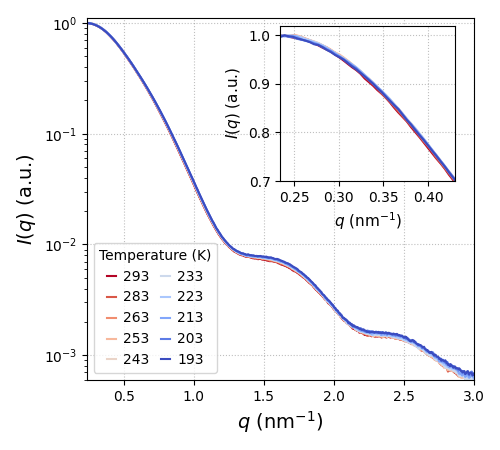

In [56]:
f, ax = plt.subplots(1, 1, figsize=(5, 4.5), tight_layout=True)

# Define temperature and settings
# T = [20, 10, -10, -20, -30, -40]  # Temperatures in Celsius
T = [20, 10, -10, -20, -30, -40, -50, -60, -70, -80]
temp = np.array(T)
colors = plt.cm.coolwarm_r(np.linspace(0, 1, len(temp)))
a1 = ax.inset_axes([.5, .55, .45, .43])

# Initialize storage for S(q) and q
Soq, Soq2, q_soq, T_soq = [], [], [], []
Iq, q , T_Iq = [], [], []
Iq_dil, q_dil  = [], []

# parameters for normlization and bkg subtraction
ff = 4
b_lim1 = 3.4


# Loop over temperatures
for i, t in enumerate(temp):
    # Prefix for file naming
    txt_add = '' if t >= 0 else 'm'

    # Load data
    data = np.genfromtxt(path + f'ferr_23mol_gly_t_{txt_add}{abs(t)}_2_001.chi', skip_header=4)
    qdata = data[data[:, 1] > 0, 0]
    Idata = data[data[:, 1] > 0, 1]

    # Load diluted data
    if t >= -40:
        data_dil = np.genfromtxt(path + f'10mgpml_fer_gly_t_{txt_add}{abs(t)}_2_001.chi', skip_header=4)
    else:
        print(i, t, t+273)
        data_dil = np.genfromtxt(path + f'10mgpml_fer_gly_t_m40_2_001.chi', skip_header=4)

    qdat_dil = data_dil[data_dil[:, 1] > 0, 0]
    Idata_dil = data_dil[data_dil[:, 1] > 0, 1]

    # Plot I(q)
    y_ferr =  Idata / np.mean(Idata[qdata>b_lim1]) * np.mean(Idata_dil[qdat_dil>b_lim1]) - Ibkg
    # Iq.append(y_ferr[ff:])
    q.append(qdata[ff:])
    T_Iq.append(t + 273)
    # ax.plot(qdata[ff:], y_ferr[ff:] , c=colors[i], label=f"{temp[i]+273}") 

    # Plot dil I(q)
    if t >= -40:
        # Iq_dil.append(Idata_dil-Ibkg)
        q_dil.append(qdat_dil)
        y = (Idata_dil-Ibkg)
        # ax.plot(qdat_dil, y , c=colors[i], ls='--')

    
    # Calculate structure factor S(q)
    Iq_dil.append(Idata_dil / np.mean(Idata_dil[qdat_dil > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1]))
    Iq.append( Idata / np.mean(Idata[qdata > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1]))

    pq = Idata_dil / np.mean(Idata_dil[qdat_dil > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1])
    Sq = ( Idata / np.mean(Idata[qdata > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1]) ) / pq
   
    y = Idata / np.mean(Idata[qdata > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1])
    ax.plot(qdata[ff:], y[ff:] / np.max(y[ff:]) , c=colors[i], label=f"{temp[i]+273}") 
    a1.plot(qdata[ff:], y[ff:] / np.max(y[ff:]) , c=colors[i], label=f"{temp[i]+273}") 
    # ax.plot(qdat_dil, pq , c=colors[i], ls='--') 

    # Normalize and plot
    normalized_Sq = Sq / np.mean(Sq[(qdata > 0.8) & (qdata < 1.2)])
    # ax.plot(qdata, normalized_Sq, color=colors[i], label=f"{temp[i] + 273} K")

    # Store data for inset
    Soq.append(normalized_Sq)
    T_soq.append(temp[i] + 273)
    q_soq.append(qdata)

# -- inset Soq

# for i,t in enumerate(T_soq[:]):
#     a1.plot(q_soq[i][ff:], Soq[i][ff:], c=colors[i])
#     # a1.plot(q_soq[i][np.argmax(Soq[i][:70])], np.max(Soq[i][:70]), ls='', marker='o', c='k')
#     print(i, q_soq[i][np.argmax(Soq[i][:70])])

print(qdata[ff])
# Plot settings
ax.grid(ls=":", c="gray", alpha=0.5)
ax.set_ylabel("$I(q)$ (a.u.)", fontsize=14)
ax.set_xlabel(r"$q$ (nm$^{-1}$)", fontsize=14)
ax.set_yscale('log')
ax.set_xlim(qdata[ff],3)
ax.set_ylim(6e-4,1.1)
ax.legend(ncol=2 , loc='lower left', fontsize=10, handlelength=.7, title='Temperature (K)', columnspacing=.8, handletextpad=.5) #bbox_to_anchor=[1.1,1])

a1.grid(ls=":", c='gray', alpha=0.5)
a1.set_ylabel('$I(q)$ (a.u.)', fontsize=11)
a1.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=11)
a1.set_xlim(qdata[ff], .43)
a1.set_ylim(.7,1.02)
# a1.set_ylim(80, 270)
# plt.show()


# Plot and fit

Invalid limit will be ignored.
  ax.set_ylim(0,1e4)



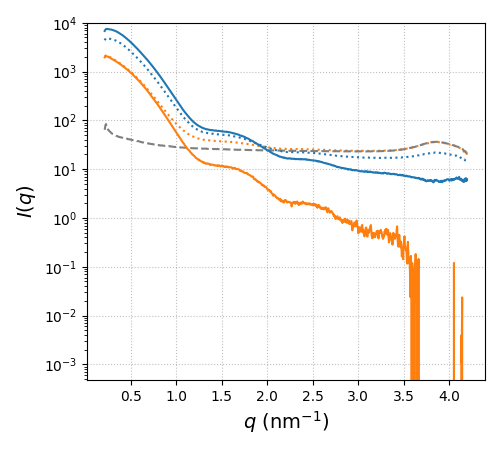

In [57]:
f, ax = plt.subplots(1, 1, figsize=(5, 4.5), tight_layout=True)

# Define temperature and settings
T = [20, 10, -10, -20, -30, -40]  # Temperatures in Celsius
temp = np.array(T)
colors = plt.cm.coolwarm_r(np.linspace(0, 1, len(temp)))

# Initialize storage for S(q) and q
Soq, Soq2, q_soq, T_soq = [], [], [], []
Iq, q , T_Iq = [], [], []
Iq_dil, q_dil  = [], []

# parameters for normlization and bkg subtraction
ff = 4
b_lim1 = 3.4


# Loop over temperatures
for i, t in enumerate(temp):
    # Prefix for file naming
    txt_add = '' if t >= 0 else 'm'

    # Load data
    data = np.genfromtxt(path + f'ferr_23mol_gly_t_{txt_add}{abs(t)}_2_001.chi', skip_header=4)
    qdata = data[data[:, 1] > 0, 0]
    Idata = data[data[:, 1] > 0, 1]

    # Load diluted data
    if t >= -40:
        data_dil = np.genfromtxt(path + f'10mgpml_fer_gly_t_{txt_add}{abs(t)}_2_001.chi', skip_header=4)
    else:
        data_dil = np.genfromtxt(path + f'10mgpml_fer_gly_t_m40_2_001.chi', skip_header=4)
    qdat_dil = data_dil[data_dil[:, 1] > 0, 0]
    Idata_dil = data_dil[data_dil[:, 1] > 0, 1]

    # Plot I(q)
    y_ferr =  Idata / np.mean(Idata[qdata>b_lim1]) * np.mean(Idata_dil[qdat_dil>b_lim1]) - Ibkg
    Iq.append(y_ferr[ff:])
    q.append(qdata[ff:])
    T_Iq.append(t + 273)
    # ax.plot(qdata[ff:], y_ferr[ff:], c=colors[i], label=f"{temp2[i]+273}, {temp2[i]}") 

    # Plot dil I(q)
    if t >= -40:
        Iq_dil.append(Idata_dil-Ibkg)
        q_dil.append(qdat_dil)
        # ax.plot(qdat_dil, (Idata_dil-Ibkg), c=colors[i], ls='--')#, label=temp2[i]+273)

    A_bkg = 1 #0.93
    
    A_bkg1 = 1.15
    # try bkg subtr
    if i==0:    
        # ax.plot(qdata, Ibkg / np.mean(Ibkg[qbkg > 3.5] * A_bkg), c='C0', label='norm bkg')

        ax.plot(qdat_dil, Idata_dil, c='C1', ls=":")
        ax.plot(qdata, A_bkg1*Ibkg, c='gray', ls='--')
        ax.plot(qdata, Idata_dil - A_bkg1*Ibkg, c='C1', ls='-')
        
        Iq_f = Idata / np.mean(Idata[qdata>b_lim1]) * np.mean(Idata_dil[qdat_dil>b_lim1]) - 0.9 * Ibkg

        ax.plot(qdata, Idata, c='C0', ls=':')
        ax.plot(qdata, Iq_f, c='C0', ls='-')
    
    
    # Calculate structure factor S(q)
    pq = Idata_dil / np.mean(Idata_dil[qdat_dil > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > b_lim1])
    Sq = ( Idata / np.mean(Idata[qdata > b_lim1]) - Ibkg / np.mean(Ibkg[qbkg > 3.5] * A_bkg) ) / pq
    
    # Normalize and plot
    normalized_Sq = Sq / np.mean(Sq[(qdata > 0.8) & (qdata < 1.2)])
    # ax.plot(qdata, normalized_Sq, color=colors[i], label=f"{temp[i] + 273} K")

    # Store data for inset
    Soq.append(normalized_Sq)
    T_soq.append(temp[i] + 273)
    q_soq.append(qdata)

# new Soq with avg Iq_dil

# # -- inset Soq
# a1 = ax.inset_axes([.5, .55, .45, .43])
# for i,t in enumerate(T_soq):
#     a1.plot(q_soq[i], Soq[i], c=colors[i])

# Plot settings
ax.grid(ls=":", c="gray", alpha=0.5)
ax.set_ylabel("$I(q)$", fontsize=14)
ax.set_xlabel(r"$q$ (nm$^{-1}$)", fontsize=14)
ax.set_yscale('log')
# ax.set_xlim(qdata[ff],3)
ax.set_ylim(0,1e4)

a1.grid(ls=":", c='gray', alpha=0.5)
a1.set_ylabel('$S(q)$', fontsize=11)
a1.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=11)
a1.set_xlim(0.2, 0.6)
a1.set_ylim(0.7, 1.)

plt.show()


$I(q) = c \Delta\rho^2 P(q) S(q)$

In [58]:
from jscatter.formel import pDA
from jscatter.formfactor import sphere
from jscatter.formel import schulzDistribution

In [59]:
def F_sphere(q, R): 
    """Formfactor of a sphere of radius R.    
    Args:
        q (np.ndarray): momentum transfer.
        R (float): radius of particles.
    Returns:
        np.ndarray: the formfactor for each q.
    """
    
    f = 3 * (np.sin(q*R) - q*R*np.cos(q*R)) / ((q*R)**3)  
    return f

def Pq_fit(q, R, A):
    """Formfactor of a sphere of radius R.    
    Args:
        q (np.ndarray): momentum transfer.
        R (float): radius of particles.
    Returns:
        np.ndarray: the formfactor for each q.
    """
    ff = A * F_sphere(q, R)
    return ff


def Pq_fit_poly(q, R, A, sigma):
    """Formfactor of a sphere of radius R.    
    Args:
        q (np.ndarray): momentum transfer.
        R (float): radius of particles.
        A: amplitude
        sigma: sigma of polydispersity
    Returns:
        np.ndarray: the formfactor for each q.
    """
    # plt.plot(r/R, schulzDistribution(r, R, sigma).Y, lw=2, label=f"{sigma/R*100:.0f}")
    f = A * pDA(sphere, sigma, 'radius', type='Schulz', q=q, radius=R).Y
    # s = schulzDistribution(r, R, sigma).Y
    # ff = A * F_sphere(q, R)
    return f
    

In [60]:
np.shape(q_dil)

(6, 842)

Radius: 2.96 ± 0.00
0.41885996
0.43779147
0.42832571
0.40939417
0.43305859
0.44252434


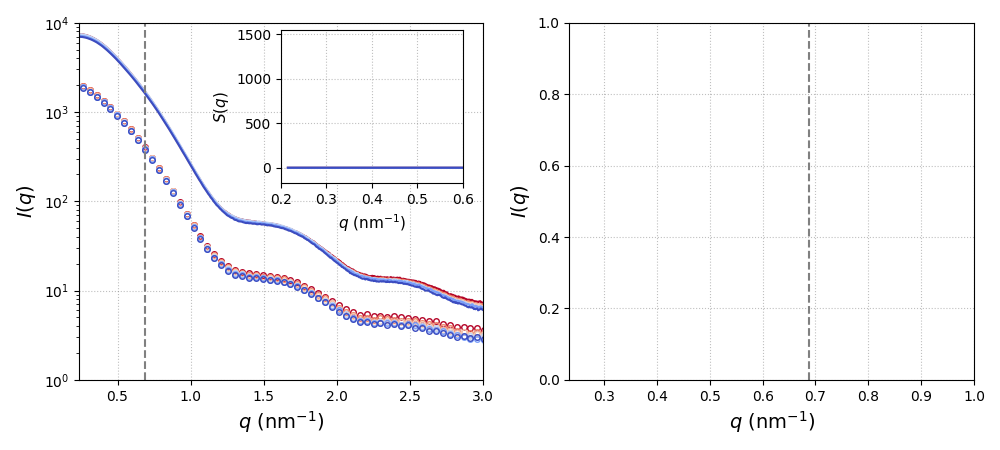

In [63]:
f, (ax, a2) = plt.subplots(1, 2, figsize=(10, 4.5), tight_layout=True)
colors = plt.cm.coolwarm_r(np.linspace(0, 1, len(T_Iq)))

# Soq, q_soq, T_soq 
# Iq, q , T_Iq 
# Iq_dil, q_dil

# Plot I(q)
for i,t in enumerate(T_Iq):
    ax.plot(q[i], Iq[i], c=colors[i], label=f"{T_Iq[i]}") 

Rs = np.empty(shape=(2,len(T_soq)))
l = -1
# Plot dil I(q)
for i,t in enumerate(T_soq):
    ax.plot(q_dil[i][::10], Iq_dil[i][::10], c=colors[i], ls='', marker='o', mfc='none', ms=4)
    # a2.plot(q_dil[i][::10], Iq_dil[i][::10], c=colors[i], ls='', marker='o', mfc='none', ms=4)
    # fit
    # popt, xc, curve, perr = fit(Pq_fit, q_dil[i][:l], Iq_dil[i][:l], p0=[4, 2e3],  )#bounds=[(), (1, 10, 250)])
    # popt, xc, curve, perr = fit(Pq_fit_poly, q_dil[i][ff:l], Iq_dil[i][ff:l], p0=[4, 1e3, 0.4], bounds=[(0,0,0), (10,1e5,1)] ) #Pq_fit_poly(q, R, A, sigma):
    # print(popt)
    # ax.plot(xc, curve, c=colors[i], lw=1)
    # a2.plot(xc, curve, c=colors[i], lw=1)
    Rs[0,i], Rs[1,i] = popt[0], perr[0]

    # s = Iq[i] / Iq_dil[i][ff:]
    # s2 = Iq[i] / np.mean(Iq[i][q[i] > 3.4])  /  (Pq_fit_poly(q[i], *popt) / np.mean( Pq_fit_poly(q[i], *popt)[q[i] > 3.4]))
    # a2.plot(q[i], s2, c=colors[i]   )
    # a1.plot(q[i], s2, c=colors[i]   )

print(f"Radius: {np.mean(Rs[0,:]):.2f} ± {np.std(Rs[0,:]):.2f}")

# avg = np.average(Iq_dil, axis=0)
# ax.plot(q_dil[i], avg, ls='--', c='k')
ax.axvline(x=q_dil[i][100], ls='--', c='gray')
a2.axvline(x=q_dil[i][100], ls='--', c='gray')


# -- inset Soq
a1 = ax.inset_axes([.5, .55, .45, .43])
for i,t in enumerate(T_soq):
    a1.plot(q_soq[i], Soq[i], c=colors[i])
    print(q_soq[i][np.argmax(Soq[i][:50])])
    

# Plot settings
ax.grid(ls=":", c="gray", alpha=0.5)
ax.set_ylabel("$I(q)$", fontsize=14)
ax.set_xlabel(r"$q$ (nm$^{-1}$)", fontsize=14)
ax.set_yscale('log')
ax.set_xlim(qdata[ff],3)
ax.set_ylim(1,1e4)

a1.grid(ls=":", c='gray', alpha=0.5)
a1.set_ylabel('$S(q)$', fontsize=11)
a1.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=11)
a1.set_xlim(0.2, 0.6)
# a1.set_ylim(0.7, 1.)


a2.grid(ls=":", c="gray", alpha=0.5)
a2.set_ylabel("$I(q)$", fontsize=14)
a2.set_xlabel(r"$q$ (nm$^{-1}$)", fontsize=14)
# a2.set_yscale('log')
a2.set_xlim(qdata[ff],1)
# a2.set_ylim(10,2.5e3)

plt.show()



Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(



# Something else

In [ ]:
#Iqs=np.load('./data_for_maddalena/Iq_all.npy')
data=np.array(np.genfromtxt('/Users/new_admin/nextcloud/SAXS/data_for_maddalena/ferr_23mol_gly_t_10_2_001.chi',skip_header=4,)[:])
#data1=(np.genfromtxt('./data_beamtime/ferritin-ff-s13.dat'))


concs=[730,404,180,70,10]
specific_volume_protein=0.465e-3 #%ml mg−1
vf_i=specific_volume_protein*np.array(concs)#[.165,.125,.095]
print(vf_i)



qf=data[:,0]
ff=data[:,1]

qf1=data1[:,0]
ff1=data1[:,1]


[0.33945 0.18786 0.0837  0.03255 0.00465]


NameError: name 'data1' is not defined

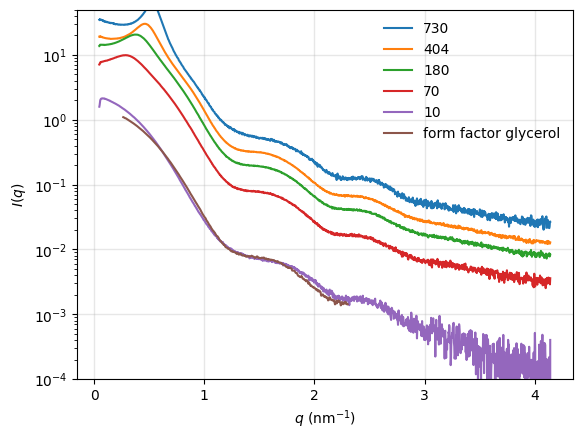

In [ ]:
plt.figure()
for i in range(len(Iqs)-1):
    plt.plot(Iqs[-1],Iqs[i],label=concs[i])
#plt.plot(Iqs[-1],Iqs[-2]*10,label=concs[i])

plt.plot(qf1[ff1>0],ff1[ff1>0]/10,label='form factor glycerol')

plt.yscale('log')
plt.legend(frameon=False)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(1E-4,50E0)
plt.xlabel('$q$ (nm$^{-1}$)')
plt.ylabel('$I(q)$')


plt.grid('on',lw=1,alpha=.3)

# plot I(q)

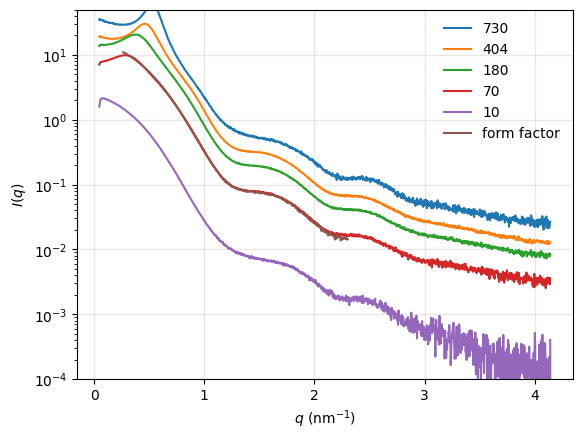

In [ ]:
plt.figure()
for i in range(len(Iqs)-1):
    plt.plot(Iqs[-1],Iqs[i],label=concs[i])
#plt.plot(Iqs[-1],Iqs[-2]*10,label=concs[i])

plt.plot(qf1[ff1>0],ff1[ff1>0],label='form factor')

plt.yscale('log')
plt.legend(frameon=False)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(1E-4,5E1)
plt.xlabel('$q$ (nm$^{-1}$)')
plt.ylabel('$I(q)$')


plt.grid('on',lw=1,alpha=.3)




# Plot form factor

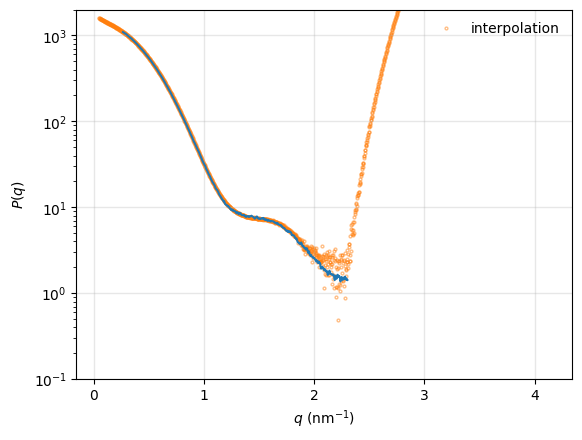

In [ ]:
plt.figure()
#plt.plot(qf[ff>0],ff[ff>0])
plt.plot(qf1[::],ff1[::]*100,mfc='none',zorder=5)
q_form_factor=qf1[ff1>0]
form_factor=ff1[ff1>0]

q=Iqs[-1,:]



z = np.polyfit(q_form_factor[::],form_factor[::]*100, 10)
p15 = np.poly1d(z)
def ff15(q):
    return np.array(p15(q))


#plt.plot(Iqs[-1],Iqs[3])
plt.plot(q[:],ff15(q[:]),label='interpolation',marker='o',mfc='None',ls='',ms=2,alpha=.5,zorder=0)

plt.yscale('log')
plt.legend(frameon=False)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(1E-1,2000)
plt.xlabel('$q$ (nm$^{-1}$)')
plt.ylabel('$P(q)$')


plt.grid('on',lw=1,alpha=.3)

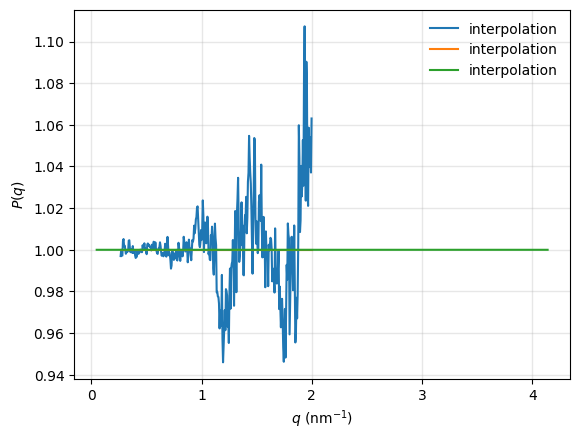

In [ ]:
plt.figure()
#plt.plot(qf[ff>0],ff[ff>0])
#plt.plot(qf1[::5],ff1[::5]*10,marker='o',mfc='none')
q_form_factor=qf1[ff1>0]
form_factor=ff1[ff1>0]

import scipy.interpolate as interpol
f=interpol.interp1d(q_form_factor,form_factor*10)

f_water=interpol.interp1d(Iqs[-1],Iqs[-2])

z = np.polyfit(q_form_factor,form_factor*10, 10)




p15 = np.poly1d(z)
def ff15(q):
    return np.array(p15(q))


#plt.plot(Iqs[-1],Iqs[3])
plt.plot(qf1[qf1<2],ff1[qf1<2]*10/ff15(qf1[qf1<2]),label='interpolation')

plt.plot(qf1[qf1<2],ff1[qf1<2]*10/f(qf1[qf1<2]),label='interpolation')

plt.plot(Iqs[-1],Iqs[-2]/f_water(Iqs[-1]),label='interpolation')
#plt.yscale('log')
plt.legend(frameon=False)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(.2,1.4)
#plt.ylim(1E-1,200)
plt.xlabel('$q$ (nm$^{-1}$)')
plt.ylabel('$P(q)$')


plt.grid('on',lw=1,alpha=.3)

# Plot S(q)

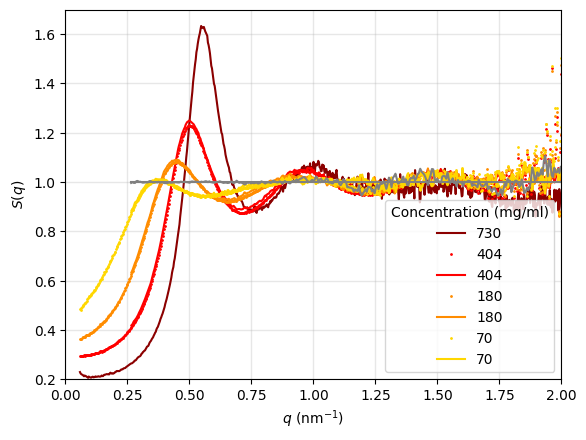

In [ ]:
colore_concentration=['darkred','red','darkorange','gold','gray']#['darkblue','blue','dodgerblue','lightblue','forestgreen']
S=[]
qminF=80
qmax=-750
plt.figure()


y1=Iqs[0,4:qmax]/f_water(Iqs[-1,4:qmax])
plt.plot(Iqs[-1,4:qmax],y1/(np.mean(y1[300:-200])),label=concs[0],color=colore_concentration[0])
S+=[y1/(np.mean(y1[300:-200]))]


for i in range(1,4):
    y=Iqs[i,4:qmax]/ff15(Iqs[-1,4:qmax])
    y1=Iqs[i,qminF:qmax]/f(Iqs[-1,qminF:qmax])
    plt.plot(Iqs[-1,4:qmax],y/(np.mean(y[300:-200])),label=concs[i],color=colore_concentration[i],marker='o',ms=1,ls='')
    plt.plot(Iqs[-1,qminF:qmax],y1/(np.mean(y1[300:-200])),label=concs[i],color=colore_concentration[i])
    
    S+=[y/(np.mean(y[300:-200]))]
    qS=Iqs[-1,4:qmax]
    

        
    
    
    
y=form_factor/ff15(q_form_factor)
y1=form_factor/f(q_form_factor)



plt.plot(q_form_factor,y/(np.mean(y[:])),c='gray')
plt.plot(q_form_factor,y1/(np.mean(y1[:])),c='gray')





plt.legend(title='Concentration (mg/ml)'),
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.2,1.7)
plt.xlim(0.,2)

plt.xlabel('$q$ (nm$^{-1}$)')
plt.ylabel('$S(q)$')


plt.grid('on',lw=1,alpha=.3)

S=np.array(S)

In [ ]:
np.save('q.npy',qS)
np.save('Structurefactors_updated.npy',S)

In [ ]:
test=np.load('Structurefactors_updated.npy')
qtest=np.load('q.npy')

In [ ]:
np.shape(qtest)

(746,)

# Fit S(q)

In [ ]:
concs=[404,180,70,10]

concs=[400,200,100,10]

specific_volume_protein=0.465e-3 #%ml mg−1
vf_i=specific_volume_protein*np.array(concs)#[.165,.125,.095]
print(vf_i)

[0.186   0.093   0.0465  0.00465]


## 2 Yukawa fit

[4.83050964 1.62323342 0.03879112 0.07558664]
[0.10000001 2.00000003 0.04166666 0.07576006]
Output TY_SolveEquation:  no root found
Output TY_SolveEquation:  no root found
Output TY_SolveEquation:  no root found
[0.10008416 2.00017557 0.04176227 0.07799825]


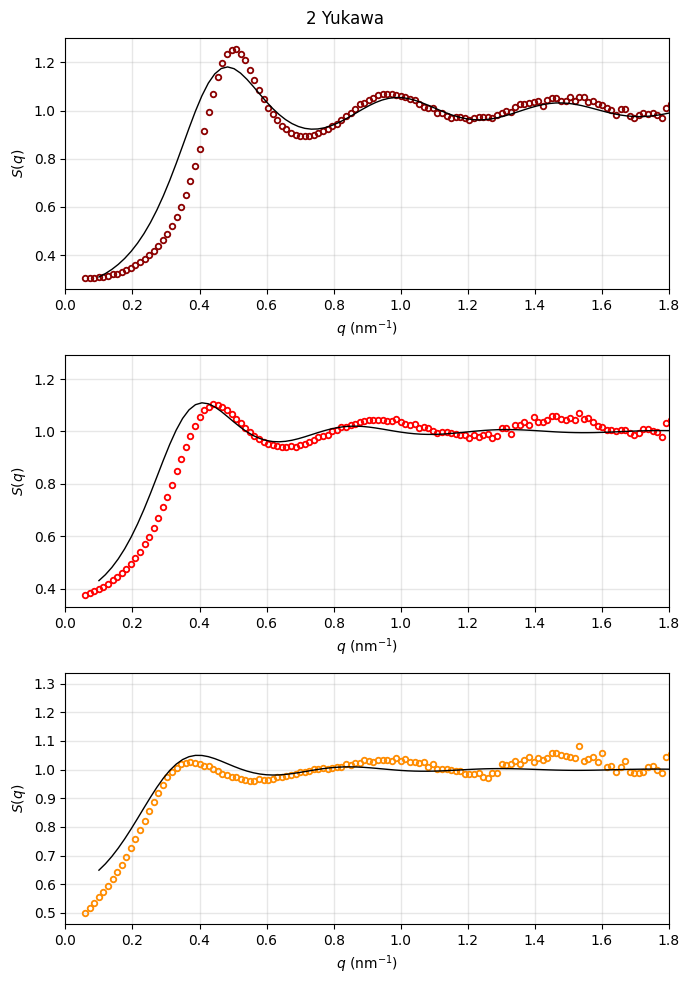

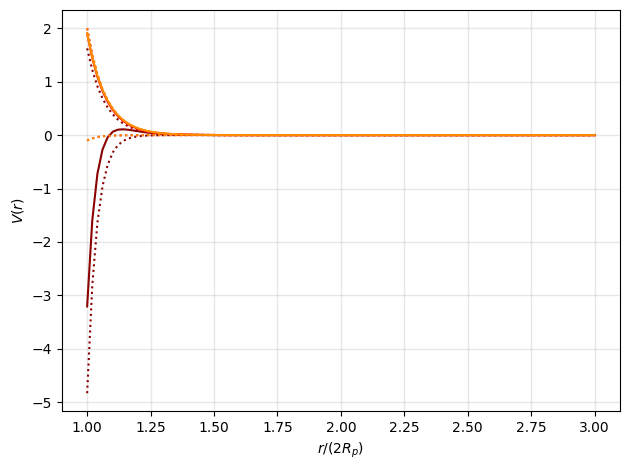

In [ ]:


#colore_concentration=['lightcoral','royalblue','orange','forestgreen']
#colore_concentration=['darkblue','blue','dodgerblue','lightblue','forestgreen']
colore_concentration=['darkred','red','darkorange','gold']#['darkblue','blue','dodgerblue','lightblue','forestgreen']


rescaling_factor=1.02

def Sq_2Y_f(q_sf,r,volume_fraction,k1,k2,l1,l2):
    Sq_js=js.sf.twoYukawa(q_sf, R=r, K1=k1, K2=-k2, scl1=l1, scl2=l2,phi=volume_fraction)
    return Sq_js.Y

vf,k1,k2,sl1,sl2 = (np.zeros([3]) for i in range(5))
R0=6.6
qplot=np.linspace(.1,2.,100)

fig1=plt.figure(figsize=(7,10))



fig2=plt.figure()


for i in range(3):
    plt.figure(fig1)
    plt.suptitle('2 Yukawa')
    plt.subplot(3,1,i+1)
    #plt.plot(qvalues,s_discretized[:,i], color=colore_concentration[i],marker=markershape[i], ls='',   markeredgewidth=.3,markeredgecolor='black')
    
    plt.plot(qS[::5],S[i,::5]*rescaling_factor,color=colore_concentration[i],marker='o', ls='', markersize=4, markeredgewidth=1.3,markerfacecolor='none')
                        # radius     # volume_fraction      att     rep     r att       r rep
    param_lower=        [R0-0.02,     vf_i[i]-0.01,        0,      0,      0/(2*R0),     .49/(2*R0),       ]

    param_upperboundary=[R0+0.02,     vf_i[i]+0.01,        10,      31,      10/(2*R0),   100/(2*R0),]   
    
    param_initialguess= [R0,             vf_i[i],           .1,      2,      .55/(2*R0),    1/(2*R0),       ]
       
    
    
    popt, pcov = curve_fit(Sq_2Y_f, xdata=qS[qS<.7], ydata=S[i,qS<.7]*rescaling_factor, 
                            bounds=( param_lower,
                                param_upperboundary),
                        p0=param_initialguess )
    vf[i]=popt[1] 
    k1[i]=popt[2] 
    k2[i]=popt[3]
    sl1[i]=popt[4]
    sl2[i]=popt[5]
    

    plt.plot(qplot,Sq_2Y_f(qplot,*popt),lw=1,c='black')
        
    print(popt[2:])
    plt.ylabel('$S(q)$')
    plt.xlabel('$q$ (nm$^{-1}$)')
    plt.tight_layout()

       
    plt.grid('on',lw=1,alpha=.3)
    
    plt.xlim(0,1.8)
    plt.figure(fig2)
    rad=np.linspace(1,3,100)

    #plt.plot(rad,popt[2]*np.exp(-(rad-1)*popt[4])/rad,color=colore_concentration[i],ls='dotted')
    #plt.plot(rad,-popt[3]*np.exp(-(rad-1)*popt[5])/rad,color=colore_concentration[i],ls='dashed')
    plt.plot(rad,-popt[2]/rad*np.exp(-(rad-1)/popt[4])+popt[3]/rad*np.exp(-(rad-1)/popt[5]),color=colore_concentration[i])

    plt.plot(rad,+popt[3]/rad*np.exp(-(rad-1)/popt[5]),color=colore_concentration[i],ls='dotted')
    plt.plot(rad,-popt[2]/rad*np.exp(-(rad-1)/popt[4]),color=colore_concentration[i],ls='dotted')
    plt.tight_layout()
    
    #plt.plot(rad,-k1*np.exp(-(rad-1)/sl1)+k2*np.exp(-(rad-1)/sl2))
    plt.xlabel('$r/(2R_p)$')
    plt.ylabel('$V(r)$')
    plt.grid('on',lw=1,alpha=.3)

## RMSA fit

[ 6.39        0.206       0.50000006 10.00006856]
[6.39000000e+00 1.13000000e-01 2.18648025e+00 1.60000000e+02]
[6.41000000e+00 5.76852831e-02 2.92100141e+00 8.81922282e+01]


(0.0, 1.7)

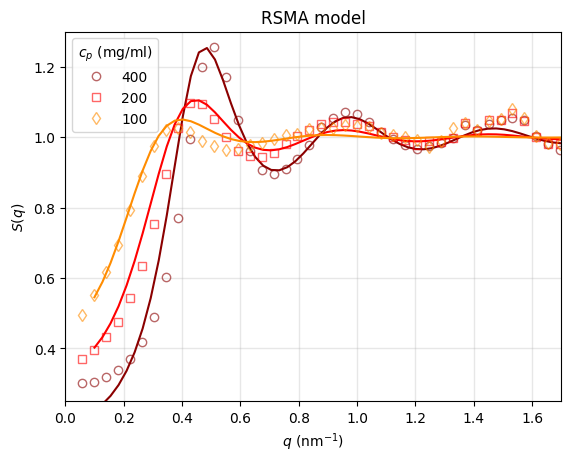

In [ ]:

markershape=['o','s','d','p','h']

qv=np.linspace(.2,.8,20)

rescaling_factor=1.02


def sfRMSA(qv, R, eta,scl, gamma):
    Sq_js=js.sf.RMSA(qv, R=R, eta=eta,scl=scl, gamma=gamma,)
    return(Sq_js.Y)


fig,axs = plt.subplots(1,1,)

#fig, axs = plt.subplots(3,1, sharex=True, gridspec_kw=dict(height_ratios=[1, 1,1]))
 
plt.title('RSMA model')
for i in range(3):
    axs.plot(qS[::15],S[i,::15]*rescaling_factor,color=colore_concentration[i],marker=markershape[i],label=concs[i],  markerfacecolor='none',ls='',alpha=.6)
    
    
    param_lower=        [ 6.39  ,vf_i[i]-.02,   .5,  10]
    param_upperboundary=[ 6.41 , vf_i[i]+.02, 6,    160]
    param_initialguess= [ 6.4, vf_i[i],   1 ,  70]


    popt, pcov = curve_fit(sfRMSA, xdata=qS[qS<1.5], ydata=S[i,qS<1.5]*rescaling_factor,
                            bounds=( param_lower,
                                 param_upperboundary),
                        p0=param_initialguess )
    
    
    qplot=np.linspace(.1,2.,70)
        
    axs.plot(qplot,sfRMSA(qplot,*popt),color=colore_concentration[i])

    print(popt)
    axs.grid('on',lw=1,alpha=.3)
    axs.set_ylabel('$S(q)$')
    axs.set_ylim(0.25,1.3)
axs.legend(title='$c_p$ (mg/ml)')
axs.set_xlabel('$q$ (nm$^{-1}$)')
axs.set_xlim(0,1.7)


[  6.39         0.206        0.50174502 101.74845661]
[6.39000000e+00 1.13000000e-01 2.17278084e+00 1.60000000e+02]
[6.41000000e+00 5.78678113e-02 2.86579628e+00 9.36477204e+01]


(0.0, 1.4)

<Figure size 700x1000 with 0 Axes>

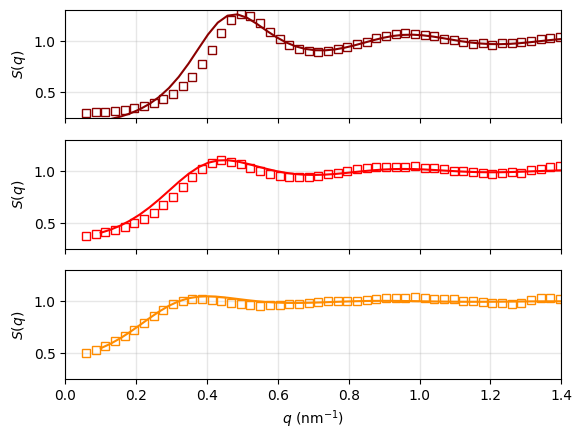

In [ ]:



qv=np.linspace(.2,.8,20)

rescaling_factor=1.02


def sfRMSA(qv, R, eta,scl, gamma):
    Sq_js=js.sf.RMSA(qv, R=R, eta=eta,scl=scl, gamma=gamma,)
    return(Sq_js.Y)


plt.figure(figsize=(7,10))

fig, axs = plt.subplots(3,1, sharex=True, gridspec_kw=dict(height_ratios=[1, 1,1]))
 
#plt.suptitle('RSMA')
for i in range(3):
    #plt.plot(qvalues,s_discretized_micheal[:,i],color=colore[i],label=f'120',marker='o',   markeredgewidth=.3,markeredgecolor='black')
    axs[i].plot(qS[::10],S[i,::10]*rescaling_factor,color=colore_concentration[i],label=f'120',marker='s',  markerfacecolor='none',ls='')
    


    
    param_lower=        [ 6.39  ,vf_i[i]-.02,   .5,  10]
    param_upperboundary=[ 6.41 , vf_i[i]+.02, 6,    160]
    param_initialguess= [ 6.4, vf_i[i],   1 ,  70]


    popt, pcov = curve_fit(sfRMSA, xdata=qS[qS<1.5], ydata=S[i,qS<1.5]*rescaling_factor,
                            bounds=( param_lower,
                                 param_upperboundary),
                        p0=param_initialguess )
    
    
    qplot=np.linspace(.1,2.,70)
        
    axs[i].plot(qplot,sfRMSA(qplot,*popt),color=colore_concentration[i])

    print(popt)
    axs[i].grid('on',lw=1,alpha=.3)
    axs[i].set_ylabel('$S(q)$')
    axs[i].set_ylim(0.25,1.3)
    
axs[i].set_xlabel('$q$ (nm$^{-1}$)')
axs[i].set_xlim(0,1.4)


## Hard spheres

[5.72502367 0.18989036]
[6.25362615 0.13239379]
[7.55079203 0.08671632]


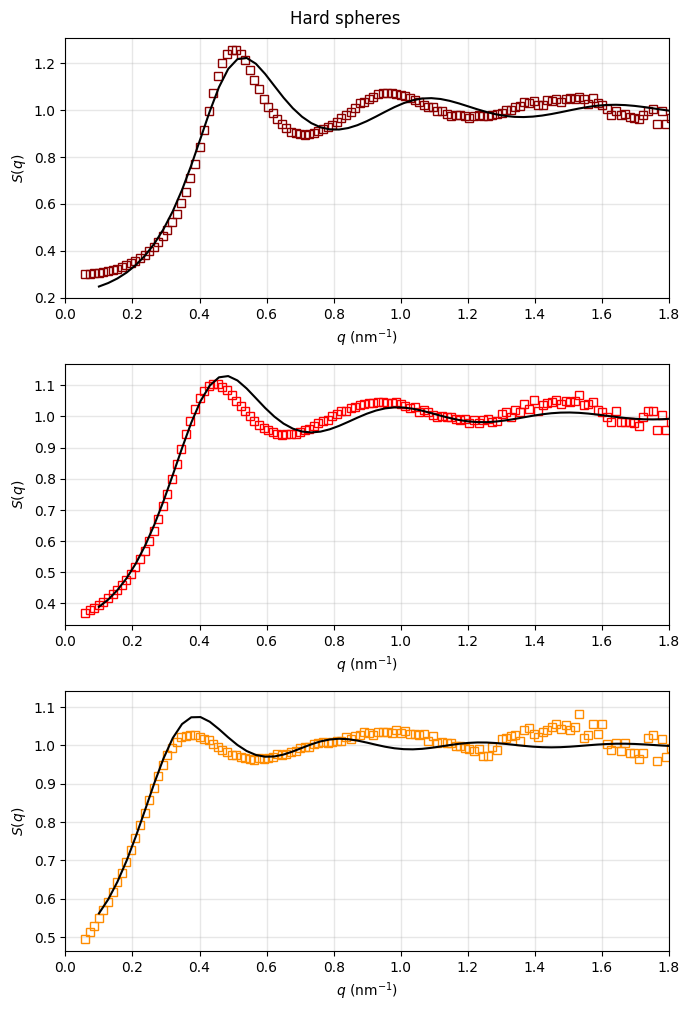

In [ ]:

R0=6.3
rescaling_factor=1.02


def sfHS(qv, R, eta,):
    Sq_js=js.sf.PercusYevick(qv, R=R, eta=eta,)
    return(Sq_js.Y)

plt.figure(figsize=(7,10))

plt.suptitle('Hard spheres')
for i in range(3):
    plt.subplot(3,1,i+1)
    
    #plt.plot(qvalues,s_discretized_micheal[:,i],color=colore[i],label=f'120',marker='o',   markeredgewidth=.3,markeredgecolor='black')
    plt.plot(qS[::5],S[i,::5]*rescaling_factor,color=colore_concentration[i],label=f'120',marker='s',  markerfacecolor='none',ls='')
    


    
    param_lower=        [ R0-2  ,vf_i[i]-.1,   ]
    param_upperboundary=[ R0+2 , vf_i[i]+.1, ]
    param_initialguess= [ R0, vf_i[i],  ]


    popt, pcov = curve_fit(sfHS, xdata=qS[qS<.5
], ydata=S[i,qS<.5]*rescaling_factor,
                            bounds=( param_lower,
                                 param_upperboundary),
                        p0=param_initialguess )
    
    
    qplot=np.linspace(.1,2.,70)
        
    plt.plot(qplot,sfHS(qplot,*popt),color='k')

    print(popt)
    plt.grid('on',lw=1,alpha=.3)
    plt.tight_layout()
    plt.ylabel('$S(q)$')
    plt.xlabel('$q$ (nm$^{-1}$)')

    plt.xlim(0,1.8)
    
    
    

2.921001413669507

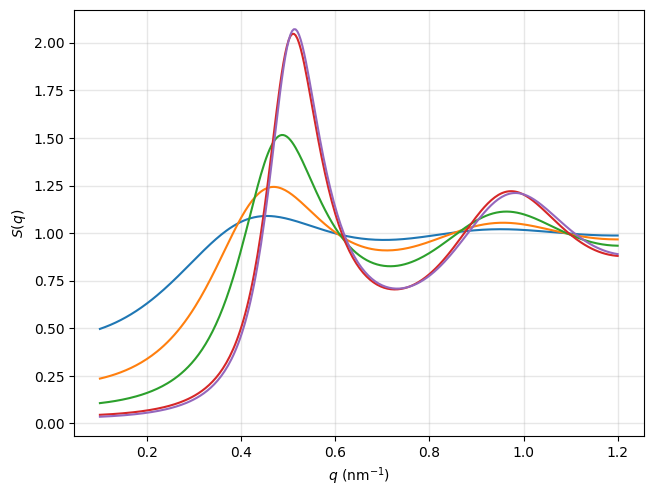

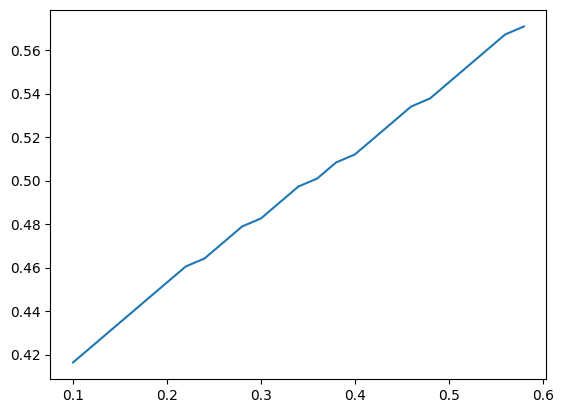

In [ ]:
qplot=np.linspace(.1,1.2,300)
plt.figure()
plt.plot(qplot,sfHS(qplot, 6.5, .1,))
plt.plot(qplot,sfHS(qplot, 6.5, .2,))
plt.plot(qplot,sfHS(qplot, 6.5, .3,))
plt.plot(qplot,sfHS(qplot, 6.5, .4,))
plt.plot(qplot,sfRMSA(qplot,popt[0],.4,popt[2],popt[3],))
plt.grid('on',lw=1,alpha=.3)
plt.tight_layout()
plt.ylabel('$S(q)$')
plt.xlabel('$q$ (nm$^{-1}$)')
qmaxs=[]
vfs=np.arange(0.1,.6,.02)
for vf in vfs:
    qmaxs+=[qplot[np.argmax(sfRMSA(qplot,popt[0],vf,popt[2],popt[3],))]]
    
    
plt.figure()
plt.plot(vfs,qmaxs)

## Sticky hard spheres

[6.5        0.20786    1.         0.30891054]
[6.5    0.1037 1.     0.1   ]
[6.61161665 0.05255    1.         0.1       ]


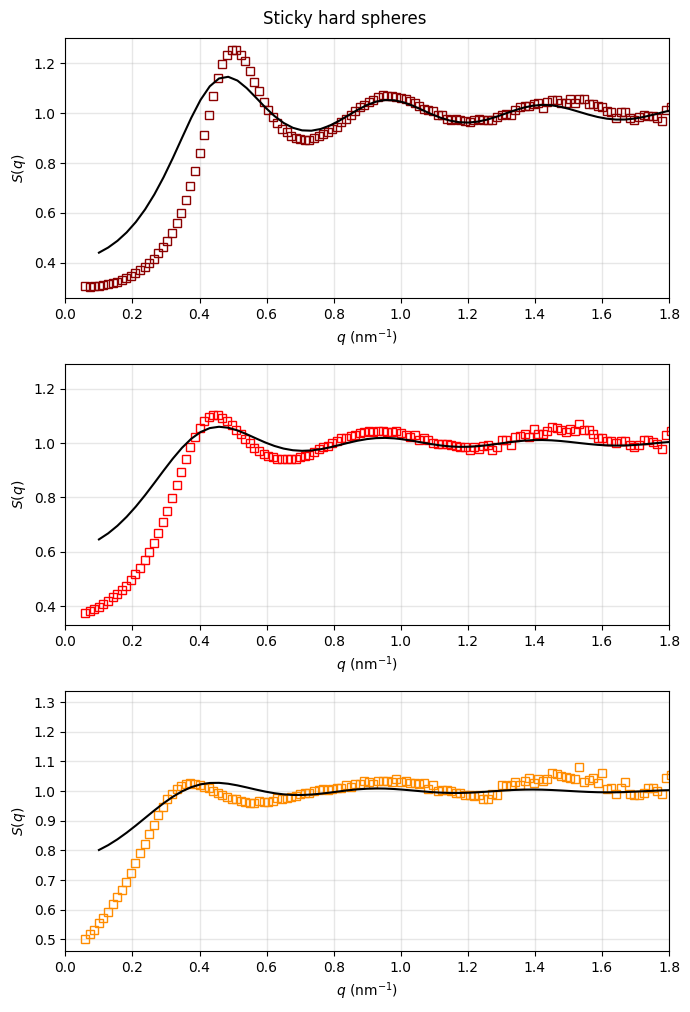

In [ ]:
r=6.7
volume_fraction=.2
depths=np.linspace(1.5,30,20)
colori=plt.cm.jet(np.linspace(0,1,len(depths)))


def Sq_SHS(q_sf,r,volume_fraction,w,d):
    Sq_js=np.array(js.sf.stickyHardSphere(q_sf, R=r, width=w, depth=d, phi=volume_fraction))
    return Sq_js[1,:]    


rescaling_factor=1.02

plt.figure(figsize=(7,10))

plt.suptitle('Sticky hard spheres')
for i in range(3):
    plt.subplot(3,1,i+1)
    #plt.plot(qvalues,s_discretized_micheal[:,i],color=colore[i],label=f'120',marker='o',   markeredgewidth=.3,markeredgecolor='black')
    plt.plot(qS[::5],S[i,::5]*rescaling_factor,color=colore_concentration[i],label=f'120',marker='s',  markerfacecolor='none',ls='')
    


    
    param_lower=        [ 6.5  ,vf_i[i]-.02,1,.1  ]
    param_upperboundary=[ 6.8 , vf_i[i]+.02,100,1000 ]
    param_initialguess= [ 6.6, vf_i[i],2,1  ]


    popt, pcov = curve_fit(Sq_SHS, xdata=qS[qS<1.], ydata=S[i,qS<1.]*rescaling_factor,
                            bounds=( param_lower,
                                 param_upperboundary),
                        p0=param_initialguess )
    
    
    qplot=np.linspace(.1,2.,70)
        
    plt.plot(qplot,Sq_SHS(qplot,*popt),color='k')

    print(popt)
    plt.grid('on',lw=1,alpha=.3)
    plt.tight_layout()
    plt.ylabel('$S(q)$')
    plt.xlabel('$q$ (nm$^{-1}$)')
    plt.xlim(0,1.8)